In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_colwidth=10000000

In [3]:
df_orignal=pd.read_csv('./laptop_details.csv')
df=df_orignal.copy()
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,"₹49,990","AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty"
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty


In [4]:
df.shape

(720, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [6]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [7]:
# changing MRP Dtype 
df['MRP'] = df['MRP'].astype(str).str.replace('[\₹,]', '', regex=True).astype(int)
# df['MRP']

In [8]:
#geting company name
df['Company']=df.Product.str.split(' ').str[0]
df['Company'] = df['Company'].astype(str)
# df['Company']
# df['Company'].value_counts()

In [9]:
import re

In [10]:
# generating useful column from freature

In [11]:
# Processor
regex = r'^(AMD|Intel|M1|Apple|Qualcomm)\s+[\w\s]*Processor'
df['Processor Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor Type']=df['Processor Type'].apply(lambda x : ''.join(x))
df['Processor Type'].unique()

array(['Intel', 'AMD', '', 'Apple', 'Qualcomm'], dtype=object)

In [12]:
processor_counts = df['Processor Type'].value_counts()
print(processor_counts)


Intel       366
AMD         303
             31
Apple        19
Qualcomm      1
Name: Processor Type, dtype: int64


In [13]:
# droping "" or unknown values
df = df.drop(df[df['Processor Type'] == ''].index)
df['Processor Type'].value_counts()


Intel       366
AMD         303
Apple        19
Qualcomm      1
Name: Processor Type, dtype: int64

In [14]:
# Operating System
regex = r'(Windows\s+\d+|Mac\s+OS|Chrome|DOS)\s+Operating System'

df['Operating System']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating System']=df['Operating System'].apply(lambda x : ''.join(x))
df['Operating System']=df['Operating System'].apply(lambda x: x.replace(" Operating System", ""))
df['Operating System'].unique()

array(['Windows 11', 'Windows 10', 'Mac OS', 'DOS', 'Chrome'],
      dtype=object)

In [15]:
#RAM
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [16]:
# Cleaning RAM 
df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM","8 GB DDR4 RAM"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("Unified Memory","Unified"))
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', '32 GB Unified RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '8 GB DDR5 RAM',
       '32 GB DDR4 RAM', '32 GB LPDDR4X RAM', '16 GB LPDDR3 RAM'],
      dtype=object)

In [17]:
# Generating RAM SIZE AND TYPE 
df[['RAM Size','GB', 'RAM Type', 'RAM1']]=df['RAM'].str.split(' ', expand=True)
df.drop(['GB','RAM1','RAM'], axis=1, inplace=True)
df['RAM Size']=df['RAM Size']+"GB"


In [18]:
df['RAM Size'].unique()

array(['8GB', '16GB', '4GB', '32GB'], dtype=object)

In [19]:
df['RAM Type'].unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified', 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

In [20]:
# Storage
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)' 

df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB SSD', '1 TB HDD256 GB SSD',
       '256 GB HDD256 GB SSD', '', '128 GB SSD', '1 TB HDD',
       '1 TB HDD512 GB SSD', '2 TB SSD'], dtype=object)

In [21]:
df['Storage'].value_counts()

512 GB SSD              361
1 TB SSD                172
256 GB SSD               94
1 TB HDD256 GB SSD       22
1 TB HDD                 14
                         10
2 TB SSD                  7
128 GB SSD                6
1 TB HDD512 GB SSD        2
256 GB HDD256 GB SSD      1
Name: Storage, dtype: int64

In [22]:
#droping "" unknown Value 
df = df.drop(df[df['Storage']==''].index)
df['Storage'].value_counts()


512 GB SSD              361
1 TB SSD                172
256 GB SSD               94
1 TB HDD256 GB SSD       22
1 TB HDD                 14
2 TB SSD                  7
128 GB SSD                6
1 TB HDD512 GB SSD        2
256 GB HDD256 GB SSD      1
Name: Storage, dtype: int64

In [23]:
# Treating Storage
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [24]:
# Generating Disk size and type from storage
df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)
df.drop(['Storage'], axis=1, inplace=True)


In [25]:
# final Clean Data
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,AMD,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD


In [26]:
df.shape

(679, 11)

In [27]:
df_orignal.shape

(720, 4)

In [28]:
df.isna().sum()

Product               0
Rating              137
MRP                   0
Feature               0
Company               0
Processor Type        0
Operating System      0
RAM Size              0
RAM Type              0
Disc Size             0
Disc Type             0
dtype: int64

In [29]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.Rating.isna().sum()

0

In [30]:
df.duplicated().sum()

294

In [31]:
df.isnull().sum()

Product             0
Rating              0
MRP                 0
Feature             0
Company             0
Processor Type      0
Operating System    0
RAM Size            0
RAM Type            0
Disc Size           0
Disc Type           0
dtype: int64

In [32]:
#Analysis Start

In [33]:
#Analysis of MRP column

In [34]:
print("Maximum", df['MRP'].max())
print("Minimum", df['MRP'].min())
print("Mean", df['MRP'].mean())
print("Median", df['MRP'].median())
print("Standard Deviation", df['MRP'].std())

Maximum 434830
Minimum 15990
Mean 82306.20324005891
Median 59990.0
Standard Deviation 61477.45249252308


<Axes: >

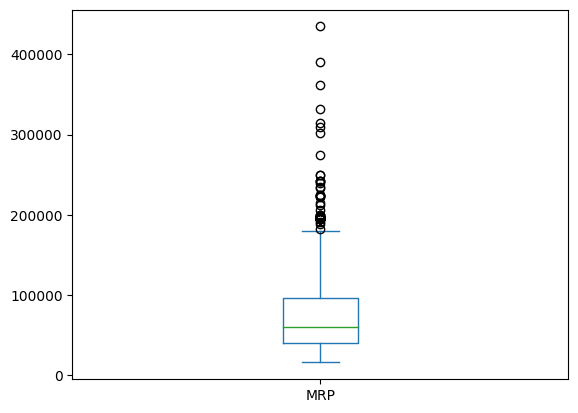

In [35]:
df['MRP'].plot(kind='box')

<Axes: ylabel='Density'>

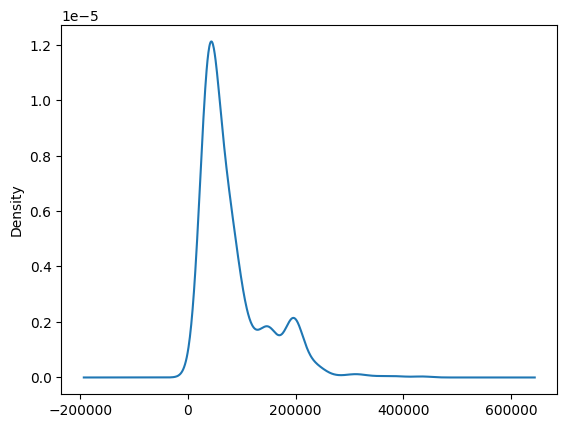

In [36]:
df['MRP'].plot(kind='kde')

In [37]:
#data is skewed 
# There are some laptop prices which are far away from group of data,
# Each data point is important so we will take transformation of this column.

<Axes: >

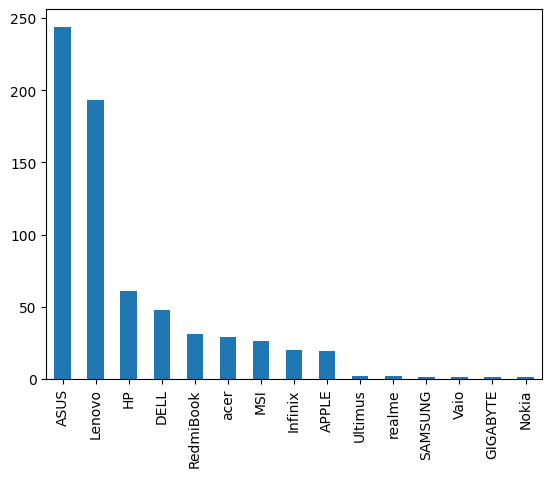

In [38]:
#analysis of Company 
df['Company'].value_counts().plot(kind='bar')

In [39]:
# Currently ASUS has most laptops in Market 

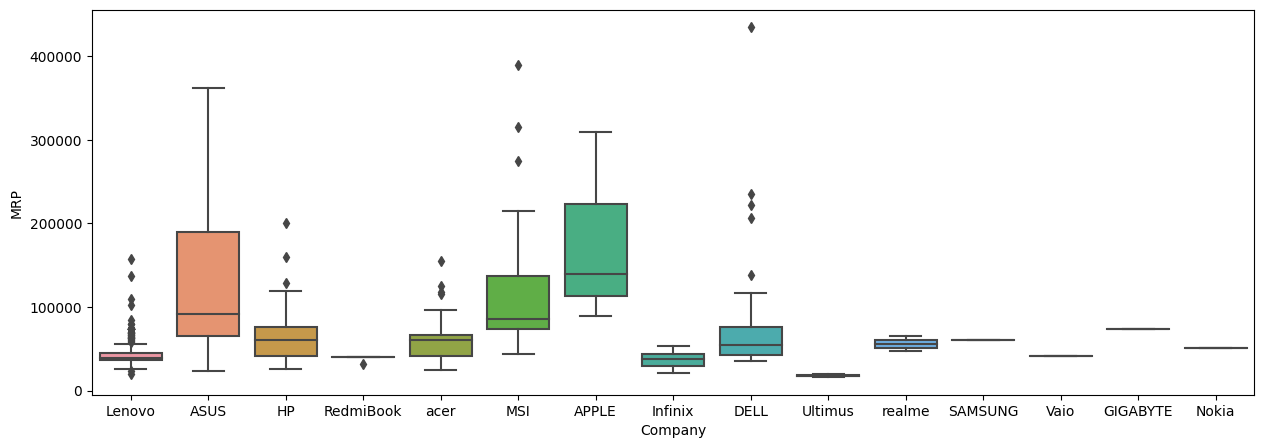

In [40]:
# let see average price of each laptop Company 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.boxplot(x='Company', y ='MRP', data=df);

In [41]:
# on Average Apple Laptop is most expensive


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 719
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           679 non-null    object 
 1   Rating            679 non-null    float64
 2   MRP               679 non-null    int32  
 3   Feature           679 non-null    object 
 4   Company           679 non-null    object 
 5   Processor Type    679 non-null    object 
 6   Operating System  679 non-null    object 
 7   RAM Size          679 non-null    object 
 8   RAM Type          679 non-null    object 
 9   Disc Size         679 non-null    object 
 10  Disc Type         679 non-null    object 
dtypes: float64(1), int32(1), object(9)
memory usage: 61.0+ KB


In [43]:
df['Operating System'].value_counts()

Windows 11    546
Windows 10    110
Mac OS         19
DOS             4
Name: Operating System, dtype: int64

<Axes: xlabel='Operating System', ylabel='MRP'>

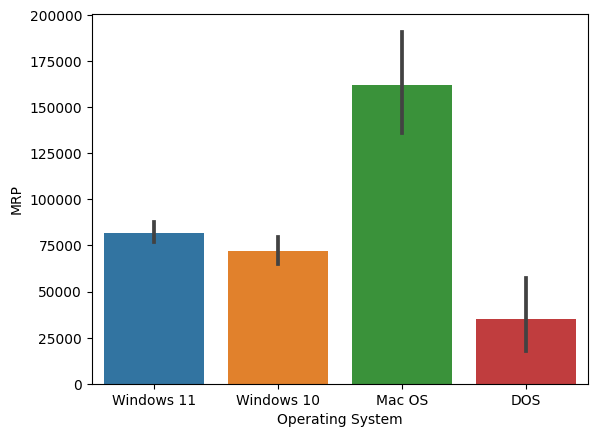

In [44]:
sns.barplot(x=df['Operating System'],y=df['MRP'])

In [45]:
# mac os operation system is most exprensive

In [46]:

# Processor Type Vs Price

In [47]:
df['Processor Type'].value_counts()

Intel    357
AMD      303
Apple     19
Name: Processor Type, dtype: int64

<Axes: xlabel='Processor Type', ylabel='MRP'>

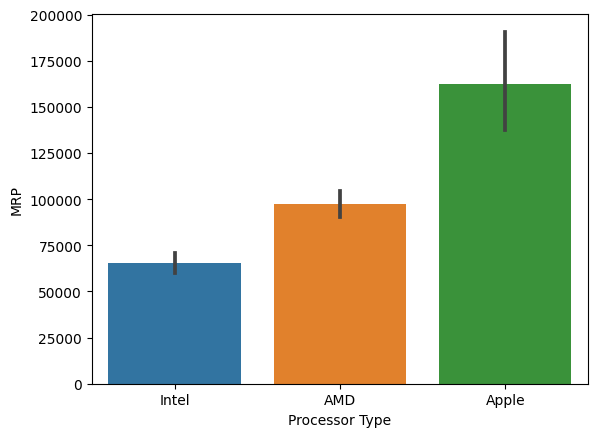

In [48]:
sns.barplot(x=df['Processor Type'],y=df['MRP'])

In [49]:
# Apple Processor is most axpensive intel is least expensive

### Relation between RAM type and MRP

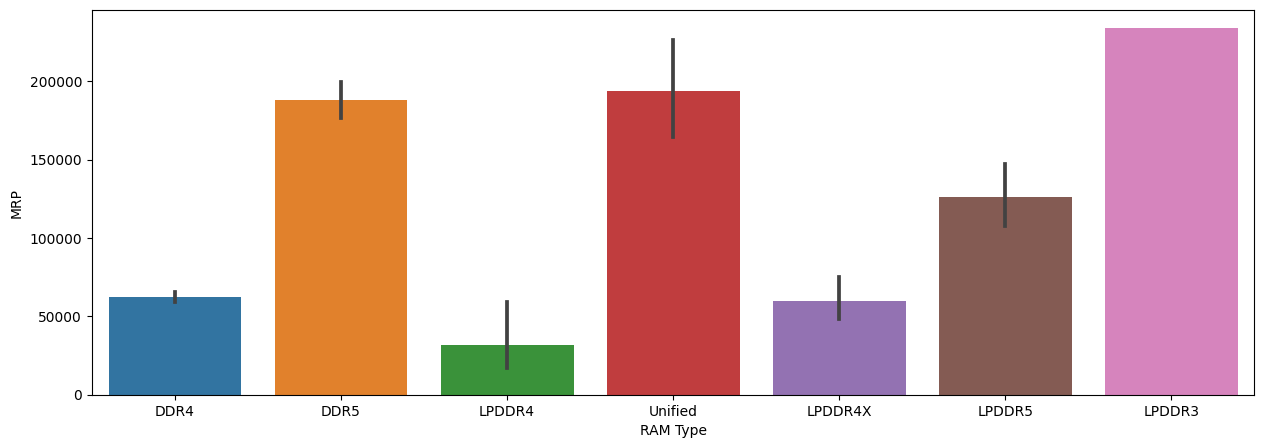

In [50]:
plt.figure(figsize=(15, 5))
sns.barplot(x='RAM Type', y ='MRP', data=df);

In [51]:
# LPDDR3 RAM type is most expensive follow by DDR5 

### Relation between RAM size and MRP

<Axes: xlabel='RAM Size', ylabel='MRP'>

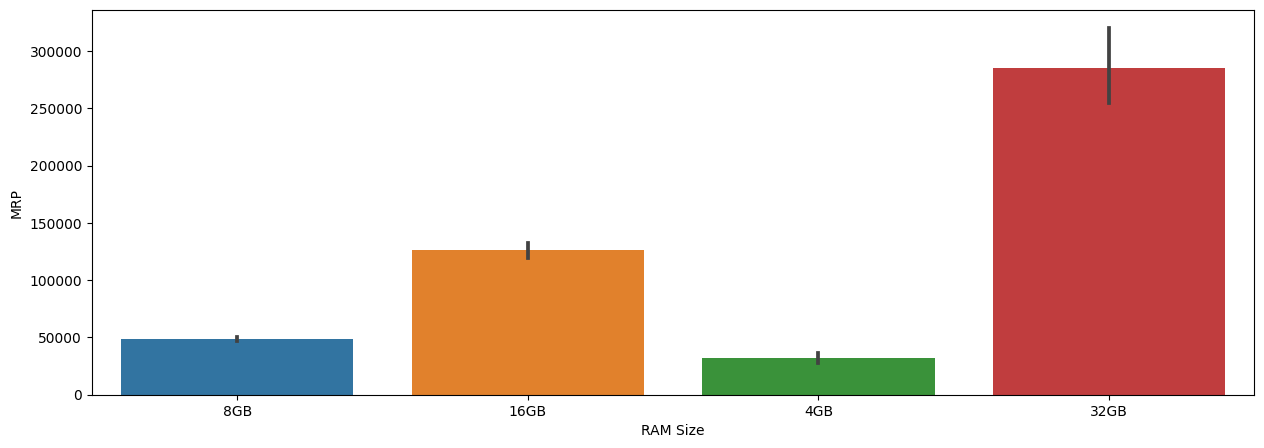

In [52]:
plt.figure(figsize=(15, 5))
sns.barplot(x='RAM Size', y ='MRP', data=df)

**Laptop Price are higher for high RAM.**

### Relation between Disc type and MRP

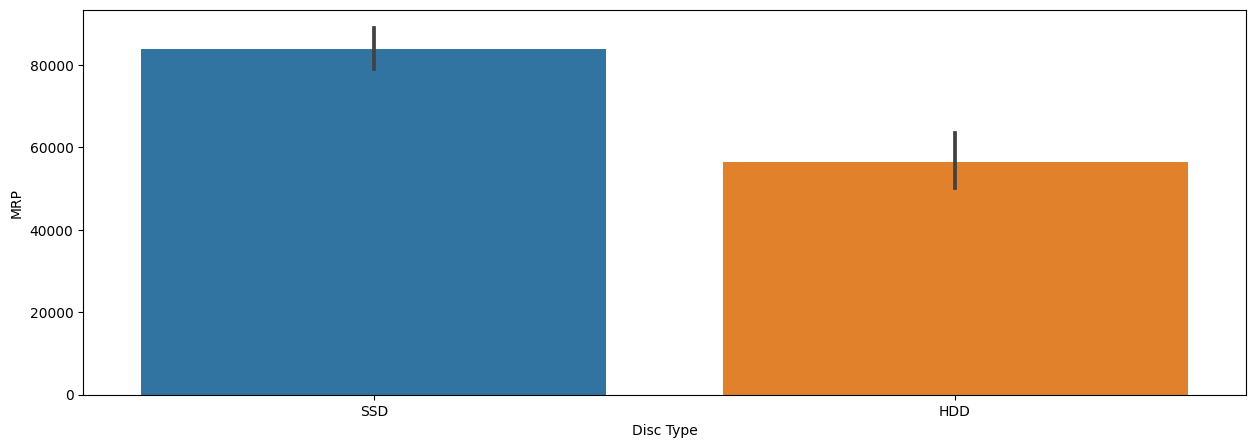

In [53]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Disc Type', y ='MRP', data=df);

In [54]:
# SSD price is more compare to HDD

### Relation between Disc size

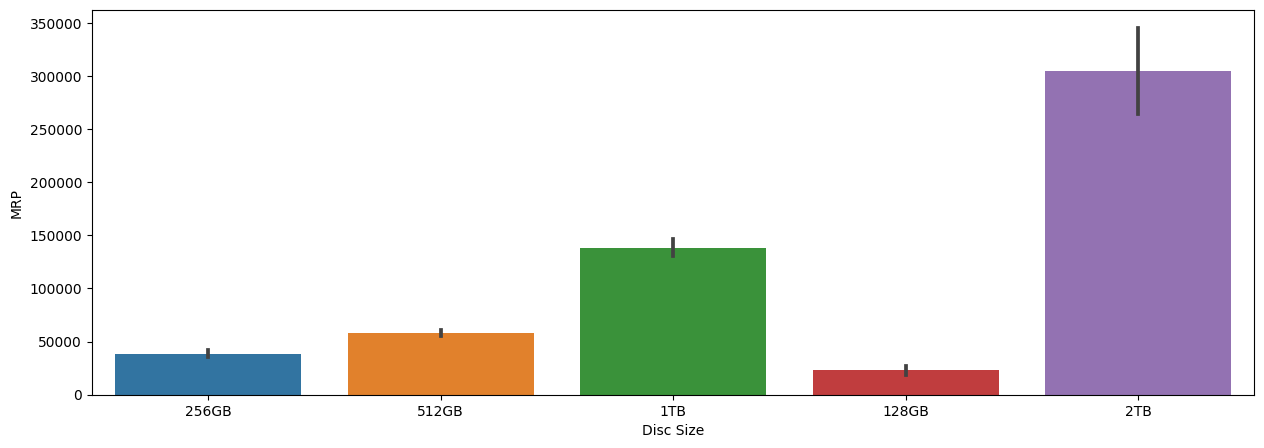

In [55]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Disc Size', y ='MRP', data=df);

In [56]:
# higher tha hard disk size higher the price

# Summay of relationship between Laptop features and Laptop Price and How the Laptop Pricing works in market.

## 1. Currently ASUS has most laptops in Market 
## 2. On Average Apple Laptop is most expensive
## 3. Mac os operation system is most exprensive
## 4. Apple Processor is most axpensive intel is least expensive
## 5. SSD price is more compare to HDD
## 6. higher tha hard disk size higher the price 2TB Disk Size is most expensive
## 7. LPDDR3 RAM type is most expensive follow by DDR5 

# Model Training

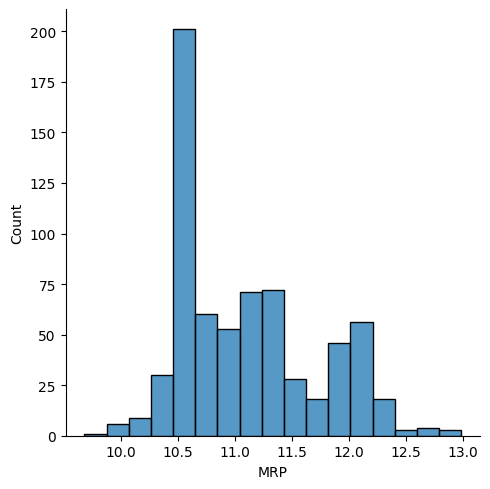

In [57]:
sns.displot(np.log(df['MRP']))

In [58]:
X = df.drop(columns=["MRP" ,"Product","Feature","Rating"])
y= np.log(df['MRP'])

In [59]:
X

,Company,Processor Type,Operating System,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo,Intel,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo,Intel,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD
3,HP,AMD,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS,Intel,Windows 11,8GB,DDR4,512GB,SSD
...,...,...,...,...,...,...,...
714,HP,AMD,Windows 10,16GB,DDR4,512GB,SSD
716,Lenovo,AMD,Windows 11,8GB,DDR4,512GB,SSD
717,ASUS,AMD,Windows 11,16GB,DDR5,1TB,SSD
718,ASUS,Intel,Windows 11,16GB,LPDDR5,512GB,SSD


In [60]:
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
714    11.407565
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 679, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [62]:
X_train

,Company,Processor Type,Operating System,RAM Size,RAM Type,Disc Size,Disc Type
453,ASUS,Intel,Windows 11,16GB,DDR4,512GB,SSD
18,MSI,AMD,Windows 11,8GB,DDR4,512GB,SSD
237,Lenovo,AMD,Windows 11,8GB,DDR4,512GB,SSD
268,ASUS,AMD,Windows 11,16GB,DDR4,512GB,SSD
497,Lenovo,AMD,Windows 11,8GB,DDR4,512GB,SSD
...,...,...,...,...,...,...,...
564,MSI,Intel,Windows 11,16GB,DDR4,1TB,SSD
615,ASUS,AMD,Windows 11,16GB,DDR5,1TB,SSD
521,Lenovo,Intel,Windows 11,8GB,DDR4,512GB,SSD
556,Lenovo,Intel,Windows 11,8GB,DDR4,256GB,SSD


In [63]:
# !pip install --upgrade scikit-learn
# import sklearn
# print(sklearn.__version__) # version model previously train on is 1.2.2 

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [65]:
from sklearn.linear_model import LinearRegression



In [66]:
X.head(1)

,Company,Processor Type,Operating System,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo,Intel,Windows 11,8GB,DDR4,256GB,SSD


In [67]:
#Linear regression

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4,5,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9193571282581624
MAE 0.13518121777778266


# Exporting model

In [68]:
import pickle

In [69]:
pickle.dump(df,open("df.pkl",'wb'))
# pipe object
pickle.dump(pipe,open("pipe.pkl",'wb'))

# ALL DONE!!!  Now Open App.py file in streamlit 